In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,make_scorer,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split,GridSearchCV # Import train_test_split function

#for visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.utils import resample

import warnings
warnings.simplefilter('ignore')

from joblib import dump, load


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
! mkdir /content/data
!cp clean_dataset_v2.csv /content/data

In [3]:
df = pd.read_csv('clean_dataset_v2.csv')
df.head()

,funding_total_usd,funding_rounds,total_investors,funding_duration,pseudoEstd,angel,convertible_note,debt_financing,equity_crowdfunding,grant,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,5.845098,2,0.0,7.0,649.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7.316785,1,1.0,0.0,654.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7.526339,4,14.0,34.0,636.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,6.060717,3,13.0,30.0,618.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,6.957633,1,0.0,0.0,639.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = df['success'].astype(int)
features = df.drop(['success'],axis=1)
features

,funding_total_usd,funding_rounds,total_investors,funding_duration,pseudoEstd,angel,convertible_note,debt_financing,equity_crowdfunding,grant,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,5.845098,2,0.0,7.0,649.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7.316785,1,1.0,0.0,654.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7.526339,4,14.0,34.0,636.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,6.060717,3,13.0,30.0,618.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,6.957633,1,0.0,0.0,639.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,6.957633,1,0.0,0.0,648.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,7.114991,1,2.0,0.0,607.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,6.243038,1,0.0,0.0,613.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,6.778151,1,0.0,0.0,661.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,6.698970,1,1.0,0.0,662.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Stratified train-test split

**Since our data is imbalanced, simple and random train-test split may divide the data in different ratio introducing bias in the dataset. So, we used stratified train-test split so that the ratio of data will be maintained.** 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,
                                                    stratify = labels,random_state=1,)

**We have splitted the data in 80-20% where the training data is further splitted in acutal training and validation dataset. 10% from the training dataset is separated as validation dataset.**

**Since we are using grid search cv for hyper parameter tuning, we have used predefined split which has a validation dataset in the same ratio as the test dataset. The balancing technique will be only applied in the train dataset and will check how it performs on the imbalanced validation dataset. This will reflect the true performaance for unseen test data.**

In [6]:
from sklearn.model_selection import PredefinedSplit
y_trInd, y_valInd = train_test_split(y_train.index, test_size=0.1,
                                           stratify =  y_train, random_state=1) 
split = y_train.copy()
split[y_trInd] = -1
split[y_valInd] = 0
val_split = PredefinedSplit(test_fold=split)
X_tr,X_val, y_tr, y_val = X_train[X_train.index.isin(y_trInd)], \
                          X_train[X_train.index.isin(y_valInd)], \
                          y_train[y_train.index.isin(y_trInd)],\
                          y_train[y_train.index.isin(y_valInd)]

In [7]:
val_split

PredefinedSplit(test_fold=array([-1, -1, ...,  0, -1]))

In [8]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=6)
X_resampled, y_resampled = ros.fit_resample(X_tr, y_tr)
XTrain, yTrain = ros.fit_resample(X_train,y_train)

Using TensorFlow backend.


In [10]:
X_resampled.shape

(46562, 129)

In [11]:
#preparation of training dataset after balancing
X_combined = np.vstack([X_resampled, X_val])
y_combined = np.hstack([y_resampled,y_val])
split=np.concatenate([np.ones_like(y_resampled)*-1, np.zeros_like(y_val)])
val_split_balanced = PredefinedSplit(test_fold=split)


**Normalization**

In [12]:
from sklearn.preprocessing import MinMaxScaler
#normalization of continuous data
scaler = MinMaxScaler()
normalizedXTrain = scaler.fit_transform(X_combined)
normalizedXTest = scaler.transform(X_test)
#print(normalizedXTrain)

## SVM

In [13]:
from sklearn.svm import SVC


In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear']}  
svm = SVC(kernel='linear', probability=True, random_state=42) 
gridSearch = GridSearchCV(svm, param_grid, refit = True, verbose = 3,scoring='roc_auc')
gridSearch.fit(normalizedXTrain, y_combined)
print(gridSearch.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.822, total=22.3min
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 22.3min remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.820, total=22.5min
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 44.8min remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.816, total=22.4min
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.817, total=22.5min
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.814, total=24.5min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.822, total=27.2min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.820, total=24.3min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.816, total=24.0min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.817, total=24.3min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

In [ ]:
#svmModel = gridSearch.best_estimator_
#gridSearch.best_score_

In [14]:
svmModel=SVC(kernel='linear',C=1,gamma=1,probability=True,random_state=42)
svmModel.fit(normalizedXTrain, y_combined)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
svmTestPredict = svmModel.predict(normalizedXTest)
svmTestScore = accuracy_score(y_test, svmTestPredict)
print("the accuracy score for testing set : {}".format(svmTestScore))
print("The macro f1 score for SVM",f1_score(y_test,svmTestPredict,average='macro'))

the accuracy score for testing set : 0.7666533705624252
The macro f1 score for SVM 0.6547375449441859



Confusion matrix for  SVM classifier


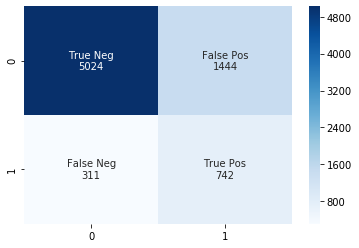

In [16]:
cnf_matrix = confusion_matrix(y_test, svmTestPredict)
print('\nConfusion matrix for  SVM classifier')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [17]:
print('Classification Report for SVM class')
svmReport = classification_report(y_test,svmTestPredict)
print(svmReport)

Classification Report for SVM class
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      6468
           1       0.34      0.70      0.46      1053

    accuracy                           0.77      7521
   macro avg       0.64      0.74      0.65      7521
weighted avg       0.86      0.77      0.80      7521



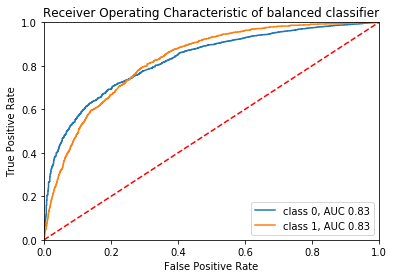

In [18]:
probs = svmModel.predict_proba(normalizedXTest)
for i in range(0,2):
    preds = probs[:,i]
    fpr, tpr, threshold = roc_curve(y_test, preds, pos_label=i)
    roc_auc =auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'class {}, AUC {}'.format(i,roc_auc.round(2)))

plt.title('Receiver Operating Characteristic of balanced classifier')    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
